# Práctico 4 - Procesamiento Digital de Imágenes

In [1]:
import imageio
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))

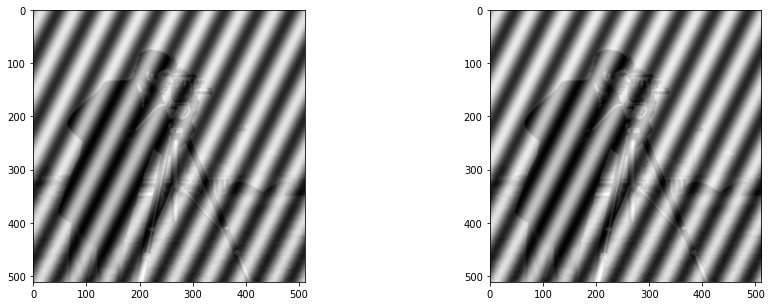

In [3]:
img_rgb = cv2.imread('tp4.png')
img = rgb2yiq(img_rgb)[:,:,0]

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb)
axes[1].imshow(img, 'gray')

# 1. Transformada Discreta de Fourier 

1. Calcular y mostrar el espectro en módulo y fase de una imagen en escala de grises. Mostrar el módulo en escala logarítmica
2. Encuentre una transformada para la amplitud y una para la fase que permita guardar el espectro en imágenes de 8 bit perdiendo la menor cantidad de información posible
3. Implementar la transformada inversa que convierta el espectro guardado en imágenes de 8 bit en la imagen original 
4. Calcular el error medio cuadrático de ir y volver a la imagen de 8bit
5. Guardar tp4.png como tp4_amp.png y tp4_phase.png. Corregir la tp4_amp.png con MS Paint o similar. Leer el espectro modificado y reconstruir la imagen.

In [4]:
# fooplot
# np.fft.fft2 help

In [5]:
X = np.fft.fftshift( np.fft.fft2(img) ) # TF con bajas frecuencias centradas
X = X / img.size # img.size: cantidad de elementos en el array

66.02286023891536


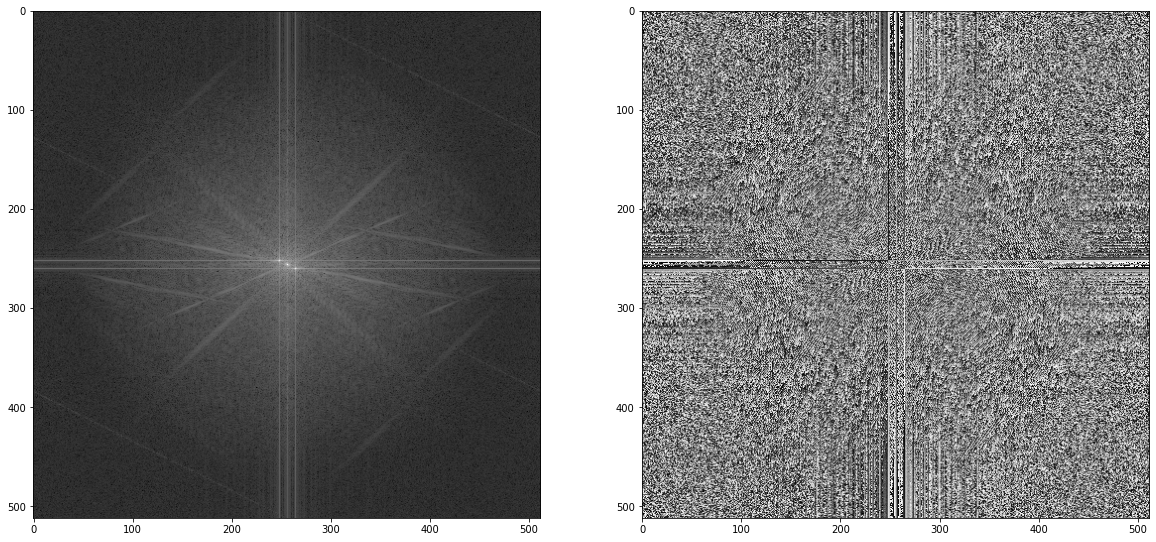

In [6]:
Xm = np.abs(X)             # Modulo de la TF
Xp = np.angle(X)           # Fase de la TF

XmGraficar = 20*np.log10(Xm) # Escala logaritmica para graficarlos

XmGuardar = 100 * Xm**(1/16) # funcion para guardar 100 x^(1/16). Multiplico por 100 ya que es un valor intermedio, pero no hice una busqueda mas exhaustiva de esa constante
XmGuardar = XmGuardar.astype(np.uint8)

Xp = (Xp * 255 / (2*np.pi)) + 128 # funcion para guardar la fase
Xp = Xp.astype(np.uint8)

print( rmse(Xm, XmGuardar) )# --> 66.02286023891536 este es valor que devuelve rmse, es alto
# ya que en la reconstruccion todo el borde de la imagen sigue con el ruido
# uno de los motivos de esta diferencia es que la modificacion fue hecha "a ojo"

imageio.imwrite('espectro.png', XmGuardar, 'png') # Guardo modulo del espectro
imageio.imwrite('fase.png', Xp, 'png') # Guardo fase del espectro
_, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow( XmGuardar, 'gray')
axes[1].imshow( Xp, 'gray')

In [13]:
img_rgb = cv2.imread('espectro_MODIFICADO.png') # Leo modulo
img_fase = cv2.imread('fase.png')# Leo fase
Xp = img_fase[:,:,0]

img = rgb2yiq(img_rgb)[:,:,0]
img = (img/100)**16 # Funcion inversa para obtener el modulo

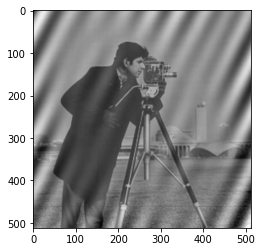

In [14]:
Xp = (Xp - 128)*(2*np.pi/255)# Funcion inversa para mantener la fase
aux = abs( img ) * np.exp( 1j * Xp )
ift = img.size * abs( np.fft.ifft2( np.fft.ifftshift( aux ) ) )

plt.imshow(ift, 'gray')